In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('airbnb_cleaned.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,subway_access,mall,stadium,airport,name_len
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,262.0,0,0,0,0,34
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,48.0,0,0,0,0,21
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaN,NaN,1,365,NaN,0,0,0,0,35
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,3.0,0,0,0,0,31
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,231.0,0,0,0,0,48


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'days_since_last_review', 'subway_access', 'mall',
       'stadium', 'airport', 'name_len'],
      dtype='object')

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,subway_access,mall,stadium,airport,name_len
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,276.925418,0.042479,0.005502,0.001268,0.018018,36.900051
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,413.916984,0.201681,0.073969,0.035587,0.133018,10.507731
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,31.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,50.000000,0.000000,0.000000,0.000000,0.000000,36.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,365.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,3024.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#drop not so important columns
irrelevant = ['id','host_id','host_name', 'last_review']
df = df.drop(irrelevant, axis = 1)

In [8]:
df_num = df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'days_since_last_review', 'name_len', 'price']]
df_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'subway_access', 'mall', 'stadium', 'airport',]]

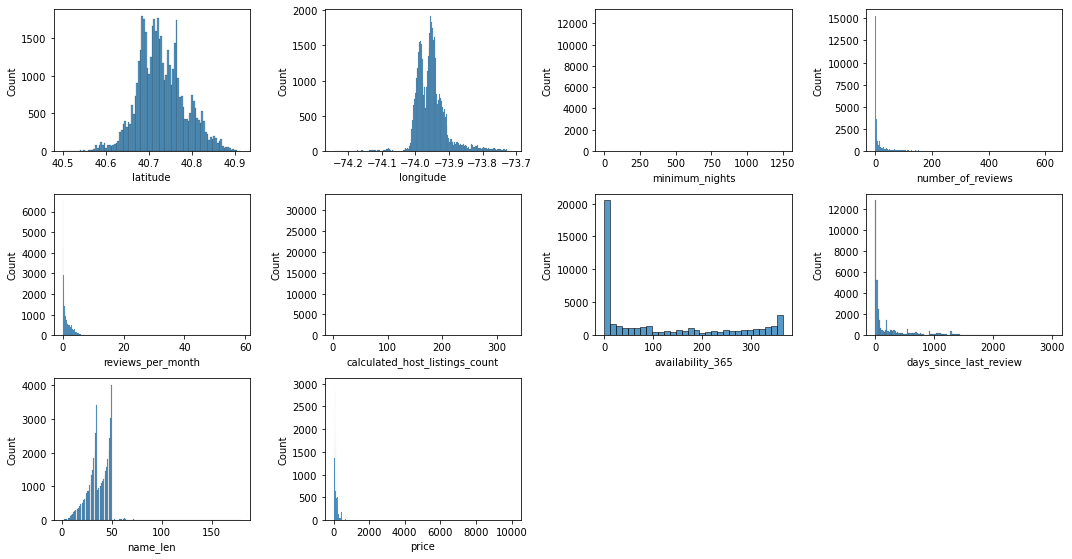

In [9]:
fig = plt.figure(figsize=(15,10))

for i in range(len(df_num.columns)):
    fig.add_subplot(4,4, i+1)
    sns.histplot(df_num.iloc[:,i], kde=False)
    
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

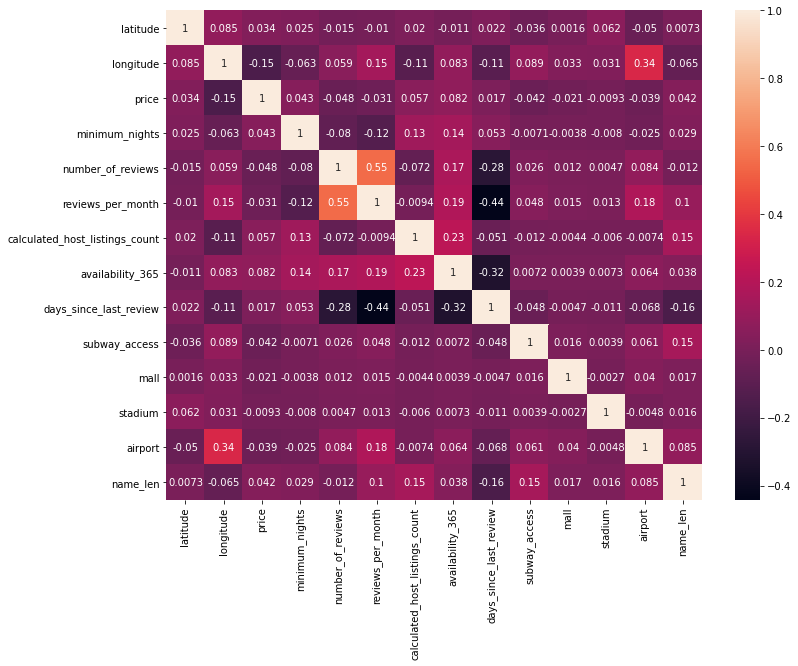

In [10]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot= True)

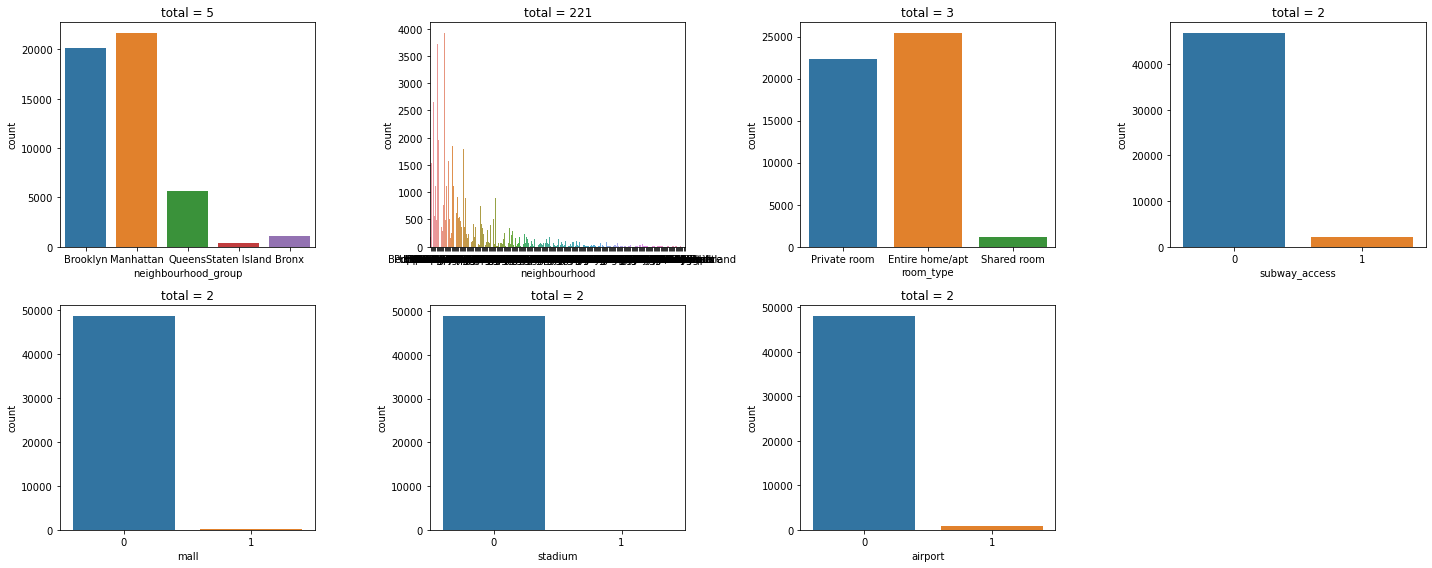

In [11]:
fig = plt.figure(figsize=(20,8))

for i in range(len(df_cat.columns)):
    fig.add_subplot(2,4, i+1)
    cat_num = df_cat.iloc[:,i].value_counts()
    sns.countplot(x=df_cat.iloc[:,i], data=df.dropna()).set_title("total = %d" % (len(cat_num)))
    
plt.tight_layout()
plt.show()

In [12]:
df_pivot = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'subway_access', 'mall', 'stadium', 'airport', 'price']]

In [13]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot, index=i, values='price').sort_values('price', ascending = False))

neighbourhood_group
                          price
neighbourhood_group            
Manhattan            196.875814
Brooklyn             124.383207
Staten Island        114.812332
Queens                99.517649
Bronx                 87.496792
neighbourhood
                     price
neighbourhood             
Fort Wadsworth  800.000000
Woodrow         700.000000
Tribeca         490.638418
Sea Gate        487.857143
Riverdale       442.090909
...                    ...
New Dorp         57.000000
Soundview        53.466667
Tremont          51.545455
Hunts Point      50.500000
Bull's Head      47.333333

[221 rows x 1 columns]
room_type
                      price
room_type                  
Entire home/apt  211.794246
Private room      89.780973
Shared room       70.127586
subway_access
                    price
subway_access            
0              154.851596
1              104.687530
mall
           price
mall            
0     153.090363
1      85.895911
stadium
              pric

ValueError: Grouper for 'price' not 1-dimensional

In [14]:
pd.pivot_table(df_pivot, index = 'neighbourhood_group', columns = 'room_type', values = 'price', aggfunc = 'count')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [15]:
pd.pivot_table(df_pivot, index = 'neighbourhood_group', columns = 'room_type', values = 'price')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [16]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

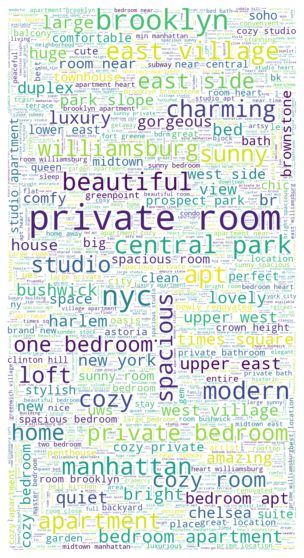

In [17]:
df = df.dropna(subset=['name'])
words = " ".join(df['name'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()